In [15]:
list(Path("C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils").iterdir())

[WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/fasta.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/gene_scripts.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/genome_dist.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/genome_stats.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/io.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/parsers.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/parsers_bbmap.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/taxonomy.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/tree.py'),
 WindowsPath('C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils/utils.py'),
 WindowsPath('C:/Users/rdkiesersi1/Docume

In [1]:
%matplotlib inline

from pathlib import Path

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

import networkx as nx
import sys
sys.path.append("C:/Users/rdkiesersi1/Documents/GitHub/atlas/workflow/scripts/utils")
import genome_dist as gd

from sklearn.manifold import TSNE


import logging


import yaml
logging.basicConfig(level=logging.INFO)

In [4]:
atlas_version = "v2.17"
with open('../atlas_output_files.yaml') as file:
    files = yaml.safe_load(file)[atlas_version]


data_dir = Path("../NewExample/")

for key1, value1 in files.items():
    if isinstance(value1, str):
        # It's a direct path
        files[key1] = str(data_dir / value1)
    elif isinstance(value1, dict):
        # It's a nested dictionary, go deeper
        for key2, value2 in value1.items():
            files[key1][key2] = str(data_dir/ value2)



In [10]:
bin_info = pd.read_table(files["vamb"]["bin_info"], index_col=0)

#bin2genome = pd.read_table(files["genomes"]["bin2genome"], index_col=0)

bin2species = pd.read_table(files["vamb"]["bin2species"], index_col=0)

bin_info = bin_info.join(bin2species)

<Axes: xlabel='Contamination', ylabel='Completeness'>

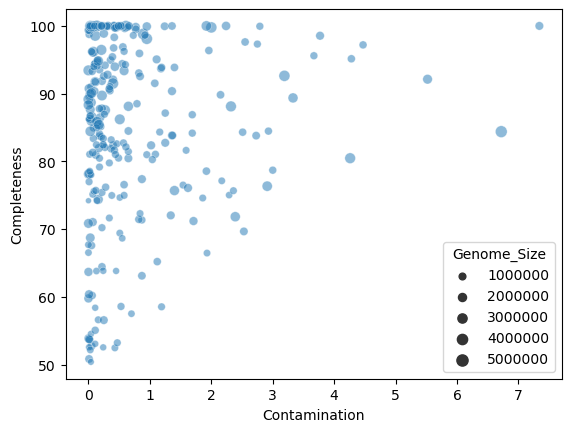

In [11]:
sns.scatterplot(data= bin_info, y="Completeness", x="Contamination", size="Genome_Size", alpha=0.5)

(50.0, 102.0)

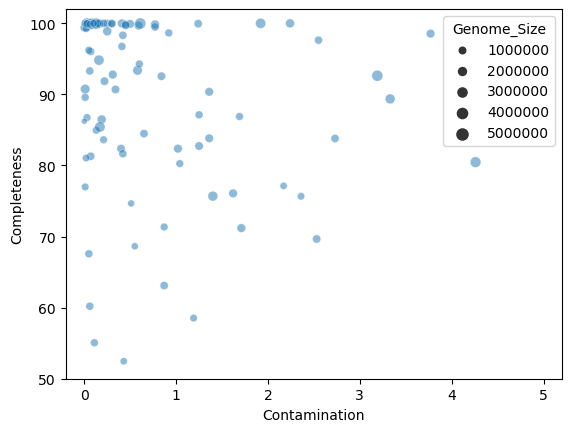

In [12]:
ax= sns.scatterplot(data= bin_info.loc[bin_info.Representative.unique() ], y="Completeness", x="Contamination", size="Genome_Size", alpha=0.5)

delta=0.2
ax.set_xlim(0-delta,5+delta)
ax.set_ylim(50,100+delta*10)

In [15]:
#bin_info.Quality_score.hist(cumulative=True)

#bin_info.loc[bin_info.Representative.unique() ].Quality_score.hist(cumulative=True)


In [39]:
M= gd.load_skani(files["vamb"]["similarities"])

(190, 190)

In [57]:
# drop labels that are not in the bin_info
for level in range(2):

    index = M.index.levels[level]
    categories_to_drop = index.categories.difference(bin_info.index)

    M.drop(categories_to_drop, level=level, inplace=True)

In [58]:
M["Align_fraction_min"] = M[["Align_fraction_ref","Align_fraction_query"]].min(axis=1)

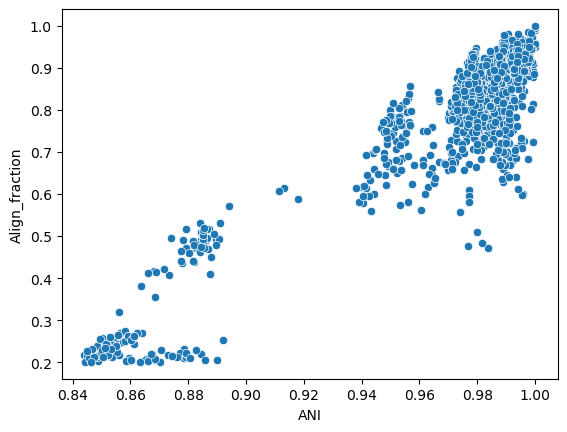

<Axes: xlabel='ANI', ylabel='Align_fraction_min'>

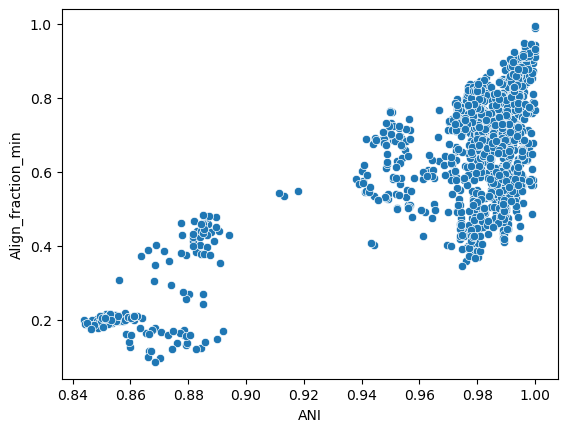

In [59]:
sns.scatterplot(data=M, x= "ANI",y="Align_fraction")

plt.show()

sns.scatterplot(data=M, x= "ANI",y="Align_fraction_min")

In [60]:
M.eval("Align_fraction_diff = abs( Align_fraction_ref - Align_fraction_query) ", inplace=True)

In [61]:
M.head()

ANI  Align_fraction_ref  \
Ref                 Query                                             
SRS1993148_vamb_78  SRS1993172_vamb_421  0.8654              0.1652   
                    SRS1993166_vamb_78   0.9952              0.8727   
                    SRS1993172_vamb_78   0.9944              0.8498   
                    SRS1993150_vamb_78   0.9951              0.8724   
SRS1993001_vamb_107 SRS1993116_vamb_107  0.9942              0.9096   

                                         Align_fraction_query  Align_fraction  \
Ref                 Query                                                       
SRS1993148_vamb_78  SRS1993172_vamb_421                0.2076          0.2076   
                    SRS1993166_vamb_78                 0.8750          0.8750   
                    SRS1993172_vamb_78                 0.8627          0.8627   
                    SRS1993150_vamb_78                 0.8739          0.8739   
SRS1993001_vamb_107 SRS1993116_vamb_107                0.8264          0.9096   

                                         Align_fraction_min  \
Ref                 Query                                     
SRS1993148_vamb_78  SRS1993172_vamb_421              0.1652   
                    SRS1993166_vamb_78               0.8727   
                    SRS1993172_vamb_78               0.8498   
                    SRS1993150_vamb_78               0.8724   
SRS1993001_vamb_107 SRS1993116_vamb_107              0.8264   

                                         Align_fraction_diff  
Ref                 Query                                     
SRS1993148_vamb_78  SRS1993172_vamb_421               0.0424  
                    SRS1993166_vamb_78                0.0023  
                    SRS1993172_vamb_78                0.0129  
                    SRS1993150_vamb_78                0.0015  
SRS1993001_vamb_107 SRS1993116_vamb_107               0.0832

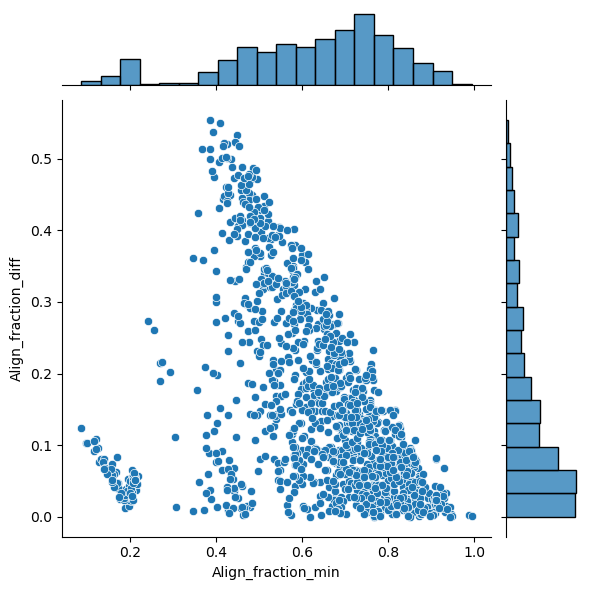

In [62]:
sns.jointplot(data=M, x= "Align_fraction_min",y="Align_fraction_diff")

In [39]:
pd.Series(M.query("Align_fraction_diff > 0.2").index.to_frame().values.ravel() ).value_counts()

SRS1992966_vamb_1724    16
SRS1993002_vamb_1846    13
SRS1993001_vamb_1776    10
SRS1992972_vamb_1776    10
SRS1992962_vamb_2370    10
SRS1992980_vamb_1783     9
SRS1992993_vamb_1903     9
SRS1992974_vamb_620      9
SRS1992995_vamb_2031     7
SRS1992968_vamb_488      6
SRS1992995_vamb_2184     6
SRS1993001_vamb_4887     6
SRS1992994_vamb_900      6
SRS1992976_vamb_993      5
SRS1992991_vamb_1783     5
SRS1993003_vamb_1677     5
SRS1992988_vamb_993      5
SRS1992964_vamb_2031     5
SRS1992960_vamb_2031     5
SRS1992970_vamb_1719     5
SRS1992999_vamb_166      4
SRS1992970_vamb_1159     4
SRS1992960_vamb_2802     4
SRS1992964_vamb_166      3
SRS1992968_vamb_166      3
SRS1993000_vamb_166      3
SRS1993001_vamb_1774     3
SRS1992995_vamb_2684     2
SRS1992960_vamb_1193     2
SRS1992966_vamb_166      2
SRS1992998_vamb_166      2
SRS1993003_vamb_1774     2
SRS1993001_vamb_214      2
SRS1993004_vamb_609      2
SRS1993000_vamb_609      2
SRS1993004_vamb_214      2
SRS1992999_vamb_609      2
S

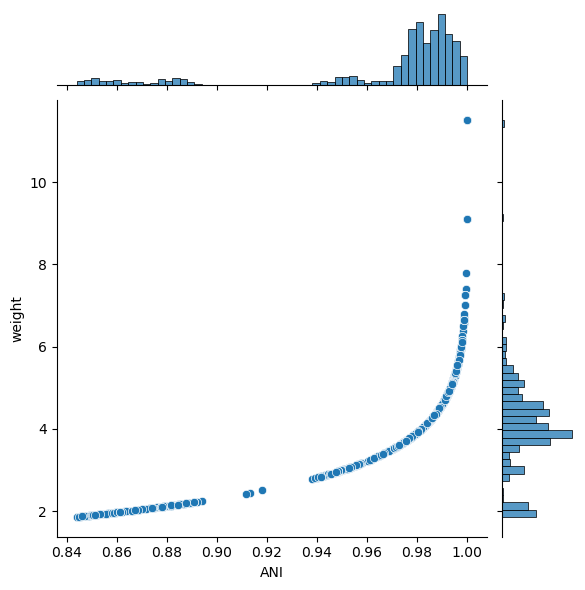

In [206]:
M.eval("weight= - log(1+1e-5-ANI)", inplace=True)

sns.jointplot(M, y="weight",x="ANI")

In [155]:
# graph



M["Label"]= (M.ANI*100).map("{:.0f}%".format)

G= gd.to_graph(M,attributes= list(M.columns))

In [178]:
bin_info.columns

Index(['Completeness', 'Completeness_General', 'Contamination',
       'Completeness_Specific', 'Completeness_Model_Used',
       'Translation_Table_Used', 'Coding_Density', 'Contig_N50',
       'Average_Gene_Length', 'Genome_Size', 'GC_Content',
       'Total_Coding_Sequences', 'Additional_Notes', 'Quality_score', 'Sample',
       'Ambigious_bases', 'Length_contigs', 'Length_scaffolds', 'N50',
       'N_contigs', 'N_scaffolds', 'logN50', 'SpeciesNr', 'Species',
       'Representative'],
      dtype='object')

In [179]:
for node_att in [ 'Genome_Size',  'Quality_score',  'Species',
       'Representative']:

    node_att_dict = bin_info[node_att].to_dict()
    nx.set_node_attributes(G, node_att_dict, name=node_att)

In [156]:
pos= nx.layout.spring_layout(G,weight="weight")

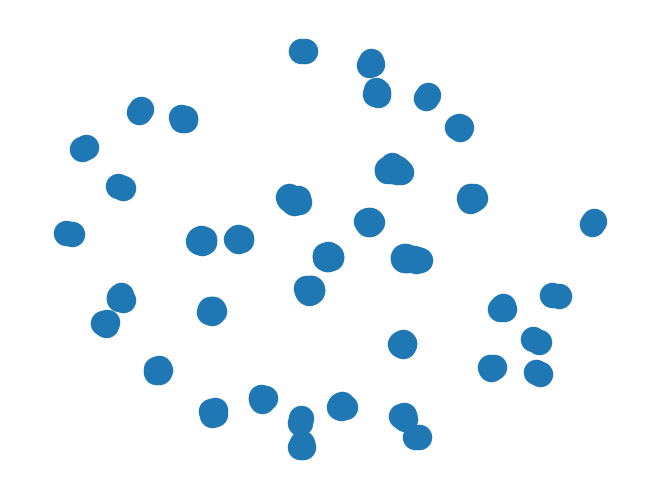

In [157]:
nx.draw(G,pos=pos)#,node_color=colors)
nx.draw_networkx_edges(G,pos=pos)

In [208]:
for cc in nx.connected_components(G):
    
    cc= list(cc)

    mags_of_cc = bin_info.loc[cc,"Representative"].unique()
    if (len(cc)>3) and (mags_of_cc.shape[0] > 1):

        print(bin_info.loc[cc,"Representative"].value_counts())

        break;
        # Create a color palette, which is a list of colors
        palette = sns.color_palette('Set2', mags_of_cc.shape[0])

        # Create a dictionary that maps categories to colors
        color_map = dict(zip(mags_of_cc, palette))
        colors = [color_map[bin_info.loc[n,"Representative"]] for n in G.subgraph(cc).nodes()]
        
        pos= nx.layout.spring_layout(G.subgraph(cc),weight="weight") 
        nx.draw(G.subgraph(cc),pos=pos,
                node_color=colors)
        nx.draw_networkx_edge_labels(G.subgraph(cc), pos=pos, edge_labels=nx.get_edge_attributes(G.subgraph(cc), 'Label'))
        plt.show()




Representative
SRS1993166_vamb_78     9
SRS1993092_vamb_67     6
SRS1993140_vamb_396    5
Name: count, dtype: int64


In [209]:
cc

['SRS1993140_vamb_396',
 'SRS1993148_vamb_78',
 'SRS1993172_vamb_421',
 'SRS1993166_vamb_78',
 'SRS1993172_vamb_78',
 'SRS1993066_vamb_78',
 'SRS1993108_vamb_396',
 'SRS1993150_vamb_78',
 'SRS1993001_vamb_67',
 'SRS1993106_vamb_78',
 'SRS1993058_vamb_67',
 'SRS1993058_vamb_78',
 'SRS1993106_vamb_421',
 'SRS1993116_vamb_67',
 'SRS1993132_vamb_78',
 'SRS1993062_vamb_67',
 'SRS1993134_vamb_396',
 'SRS1993078_vamb_67',
 'SRS1993092_vamb_67',
 'SRS1993001_vamb_78']

In [194]:
## Compare to vamb bin

bin_info["VambBin"]= bin_info.index.map(lambda s: int(s.split("vamb_")[1]))

bin_info.groupby(["Species","VambBin"]).size().to_frame().reset_index().groupby("Species").size().value_counts()

1     58
2     17
4      4
3      4
5      2
6      1
17     1
16     1
11     1
10     1
7      1
Name: count, dtype: int64

                          Representative  VambBin
genome                                           
SRS1993140_vamb_396  SRS1993140_vamb_396      396
SRS1993148_vamb_78    SRS1993166_vamb_78       78
SRS1993172_vamb_421  SRS1993140_vamb_396      421
SRS1993166_vamb_78    SRS1993166_vamb_78       78
SRS1993172_vamb_78    SRS1993166_vamb_78       78
SRS1993066_vamb_78    SRS1993166_vamb_78       78
SRS1993108_vamb_396  SRS1993140_vamb_396      396
SRS1993150_vamb_78    SRS1993166_vamb_78       78
SRS1993001_vamb_67    SRS1993092_vamb_67       67
SRS1993106_vamb_78    SRS1993166_vamb_78       78
SRS1993058_vamb_67    SRS1993092_vamb_67       67
SRS1993058_vamb_78    SRS1993166_vamb_78       78
SRS1993106_vamb_421  SRS1993140_vamb_396      421
SRS1993116_vamb_67    SRS1993092_vamb_67       67
SRS1993132_vamb_78    SRS1993166_vamb_78       78
SRS1993062_vamb_67    SRS1993092_vamb_67       67
SRS1993134_vamb_396  SRS1993140_vamb_396      396
SRS1993078_vamb_67    SRS1993092_vamb_67       67


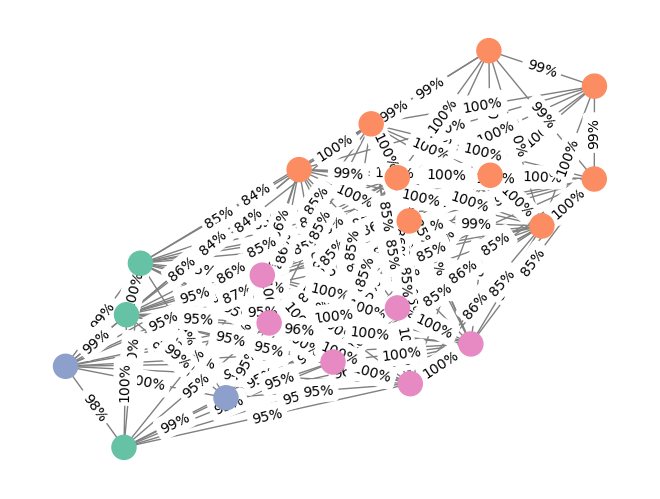

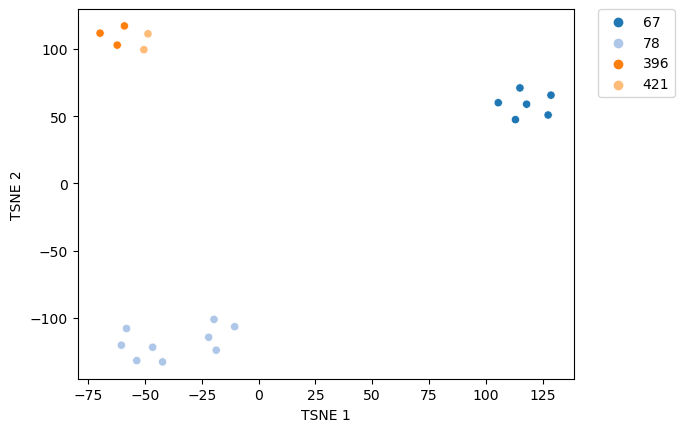

In [226]:
#cc= bin_info.query("Representative == 'SRS1992999_vamb_1155' | Representative == 'SRS1993002_vamb_81'").index.tolist()

cc= ['SRS1993140_vamb_396',
 'SRS1993148_vamb_78',
 'SRS1993172_vamb_421',
 'SRS1993166_vamb_78',
 'SRS1993172_vamb_78',
 'SRS1993066_vamb_78',
 'SRS1993108_vamb_396',
 'SRS1993150_vamb_78',
 'SRS1993001_vamb_67',
 'SRS1993106_vamb_78',
 'SRS1993058_vamb_67',
 'SRS1993058_vamb_78',
 'SRS1993106_vamb_421',
 'SRS1993116_vamb_67',
 'SRS1993132_vamb_78',
 'SRS1993062_vamb_67',
 'SRS1993134_vamb_396',
 'SRS1993078_vamb_67',
 'SRS1993092_vamb_67',
 'SRS1993001_vamb_78']


color_by= "VambBin"

mags_of_cc = bin_info.loc[cc,color_by].unique()
if mags_of_cc.shape[0] > 1:

    cc_data= G.subgraph(cc).nodes(data=True)

    print(bin_info.loc[cc,["Representative","VambBin"]])


    # Create a color palette, which is a list of colors
    palette = sns.color_palette('Set2', mags_of_cc.shape[0])

    # Create a dictionary that maps categories to colors
    color_map = dict(zip(mags_of_cc, palette))
    colors = [color_map[bin_info.loc[n,color_by]] for n in G.subgraph(cc).nodes()]
    
    pos= nx.layout.spring_layout(G.subgraph(cc),weight="weight") 
    nx.draw(G.subgraph(cc),pos=pos,with_labels=False,
            node_color=colors,edge_color="grey")


    nx.draw_networkx_edge_labels(G.subgraph(cc), pos=pos, edge_labels=nx.get_edge_attributes(G.subgraph(cc), 'Label'))
    plt.show()





#

Msub= M.loc[pd.IndexSlice[(M.index.get_level_values(0).intersection(cc) ,M.index.get_level_values(1).intersection(cc)),:]]

Dist= 1- gd.pairewise2matrix(Msub.ANI,M.ANI.min()*0.65)

embedder= TSNE(metric="precomputed",init="random", random_state=0,perplexity=5)

XT = embedder.fit_transform(Dist)

XT = pd.DataFrame(XT, index=Dist.index, columns=["TSNE 1","TSNE 2"])


sns.scatterplot(data=XT,x="TSNE 1",y="TSNE 2", hue= bin_info.loc[Dist.index,color_by],palette="tab20")


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [246]:
representatives= bin_info.Representative.unique()
non_singleton_representatives = bin_info.loc[:,"Representative"].value_counts().loc[lambda x: x>2].index

non_singleton_bins= bin_info.index[bin_info.Representative.isin(non_singleton_representatives)]

<Axes: xlabel='genome', ylabel='genome'>

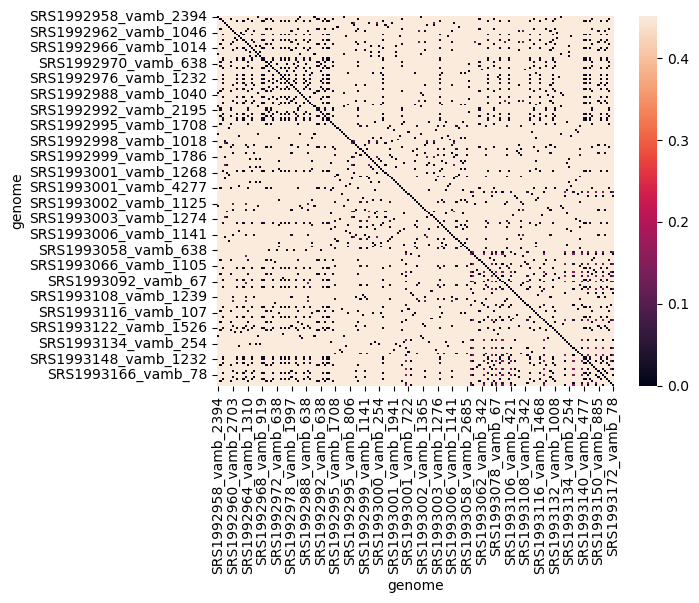

In [247]:
Dist= 1- gd.pairewise2matrix(M.ANI,M.ANI.min()*0.65)

Dist= Dist.loc[non_singleton_bins,non_singleton_bins]

sns.heatmap(Dist)

In [248]:
embedder= TSNE(metric="precomputed",init="random", random_state=0)

XT = embedder.fit_transform(Dist)

XT = pd.DataFrame(XT, index=Dist.index, columns=["TSNE 1","TSNE 2"])


41  representatives are singletons and not in M

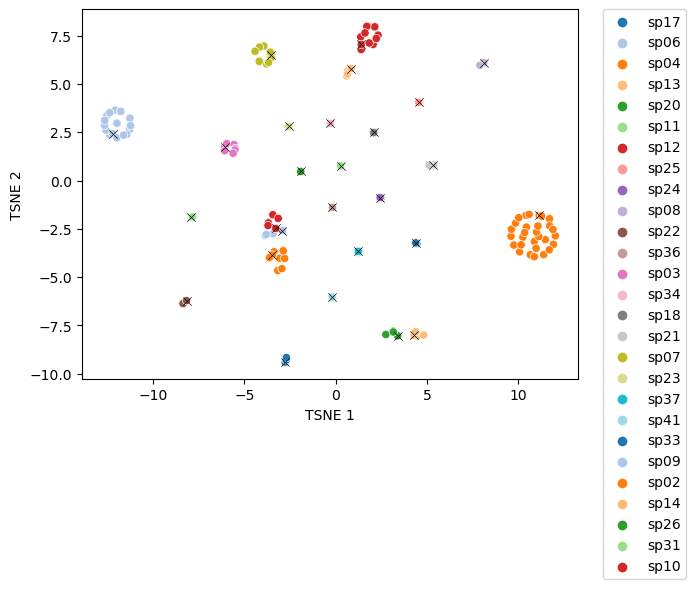

In [249]:
sns.scatterplot(data=XT,x="TSNE 1",y="TSNE 2", hue= bin_info.loc[Dist.index,"Species"],palette="tab20")

sns.scatterplot(data=XT.loc[XT.index.intersection(representatives)],x="TSNE 1",y="TSNE 2", 
#hue= bin_info.loc[representatives,"Species"],
color="k", legend=False,marker="x")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)